In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sklearn.decomposition
import scipy.signal

In [46]:
merged=pd.read_csv("../data/merged/capture_246058.txt", delimiter=",", parse_dates=['timestamp'])

In [4]:
data=pd.read_csv("../data/clean/capture.capture_246058.txt", delimiter=",", parse_dates=['timestamp'])

In [5]:
len(data) / (data["timestamp"].max() - data["timestamp"].min()).total_seconds()

11.670923661082549

In [6]:
starttime = data["timestamp"].min()
endtime = data["timestamp"].max()

In [7]:
data.set_index('timestamp', inplace=True)
data = data.resample("0.1S").mean()

In [8]:
data = data.interpolate() 

/home/redhog/Projects/innovationgarage/DrowningWarning-analytics/env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


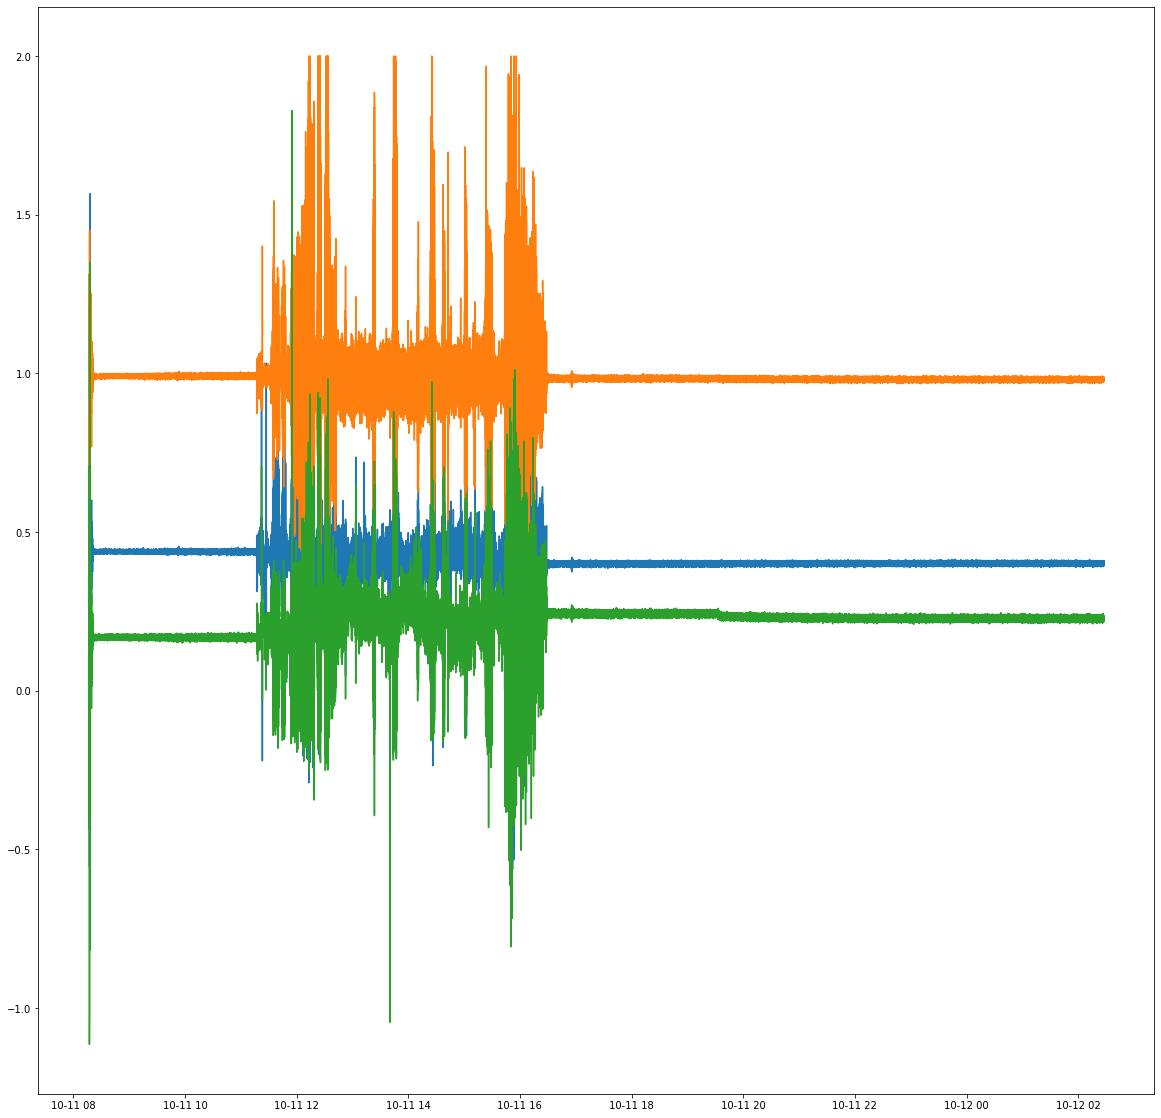

In [9]:
plt.figure(figsize=(20, 20))
plt.plot(data["ax"])
plt.plot(data["ay"])
plt.plot(data["az"])


In [14]:
len(data)/4

163573.0

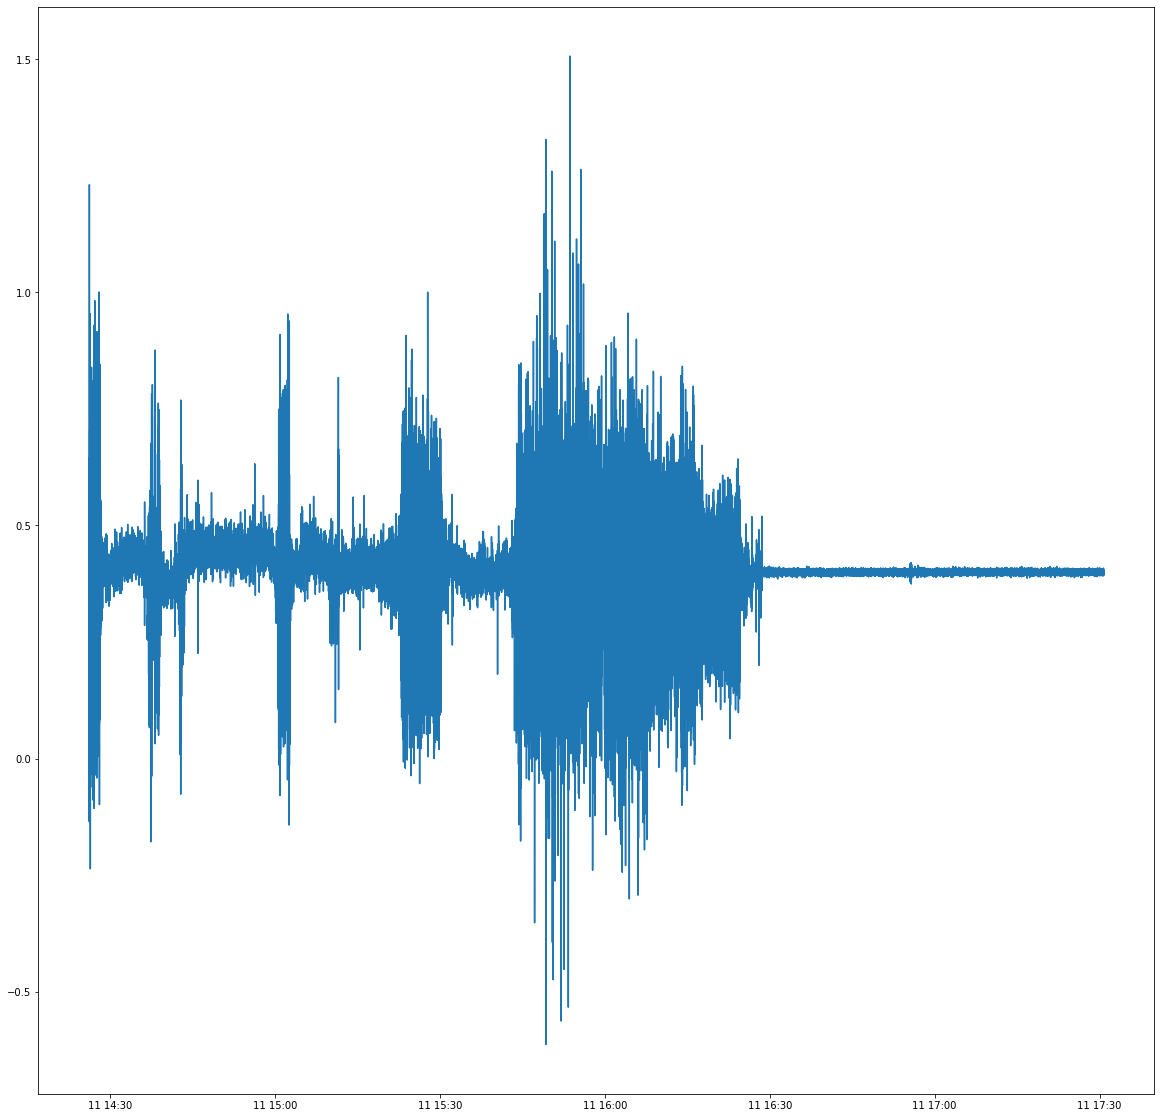

In [23]:
s = len(data) // 4
s = s+s//3 + s//48
plt.figure(figsize=(20, 20))
plt.plot(data["ax"][s:s+s//2])
plt.show()

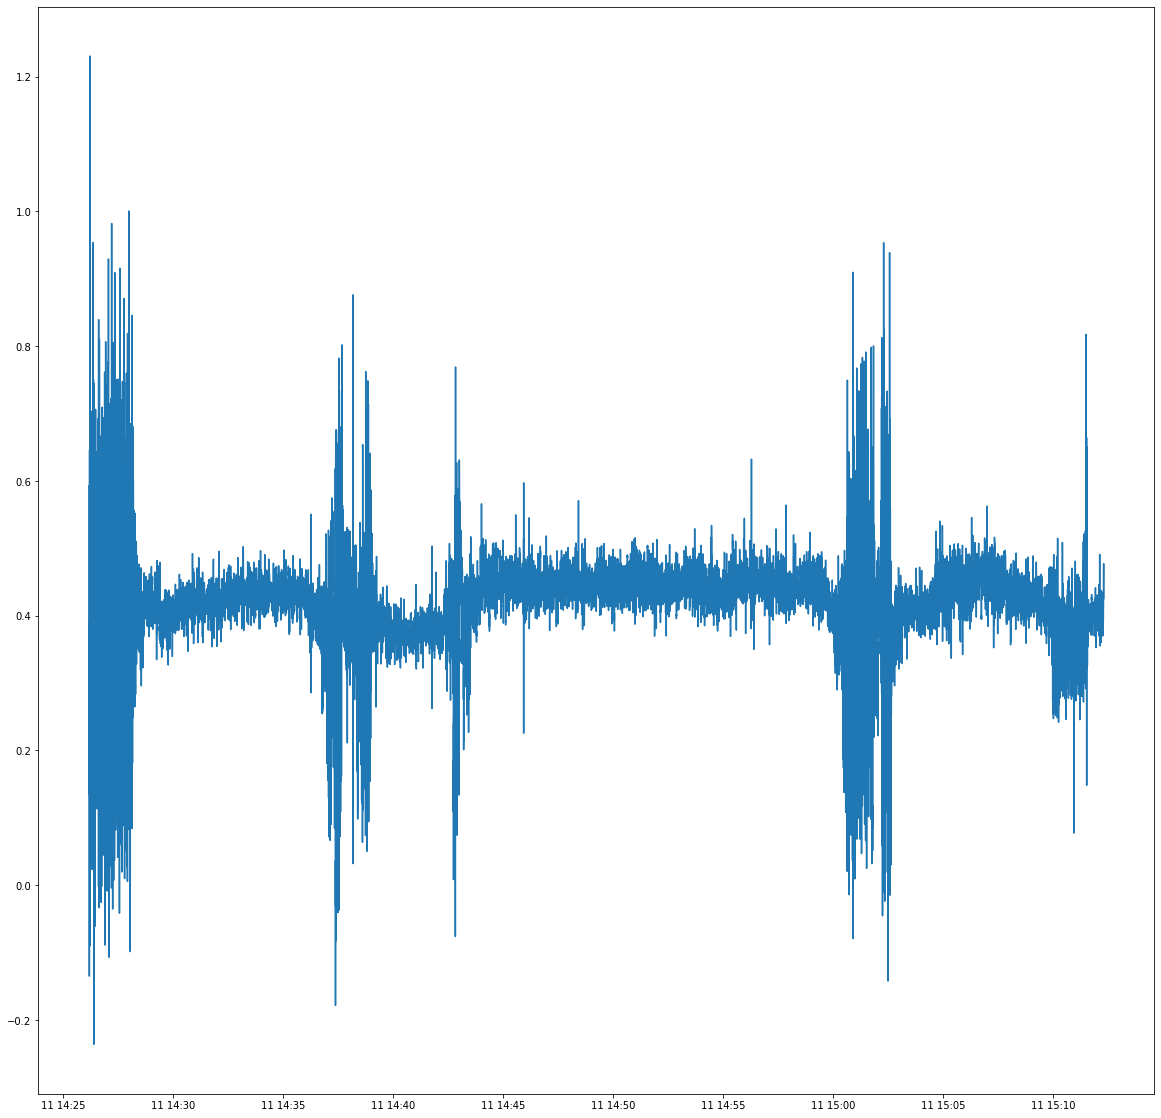

In [24]:
s = len(data) // 4
s = s+s//3 + s//48
plt.figure(figsize=(20, 20))
plt.plot(data["ax"][s:s+s//8])
plt.show()

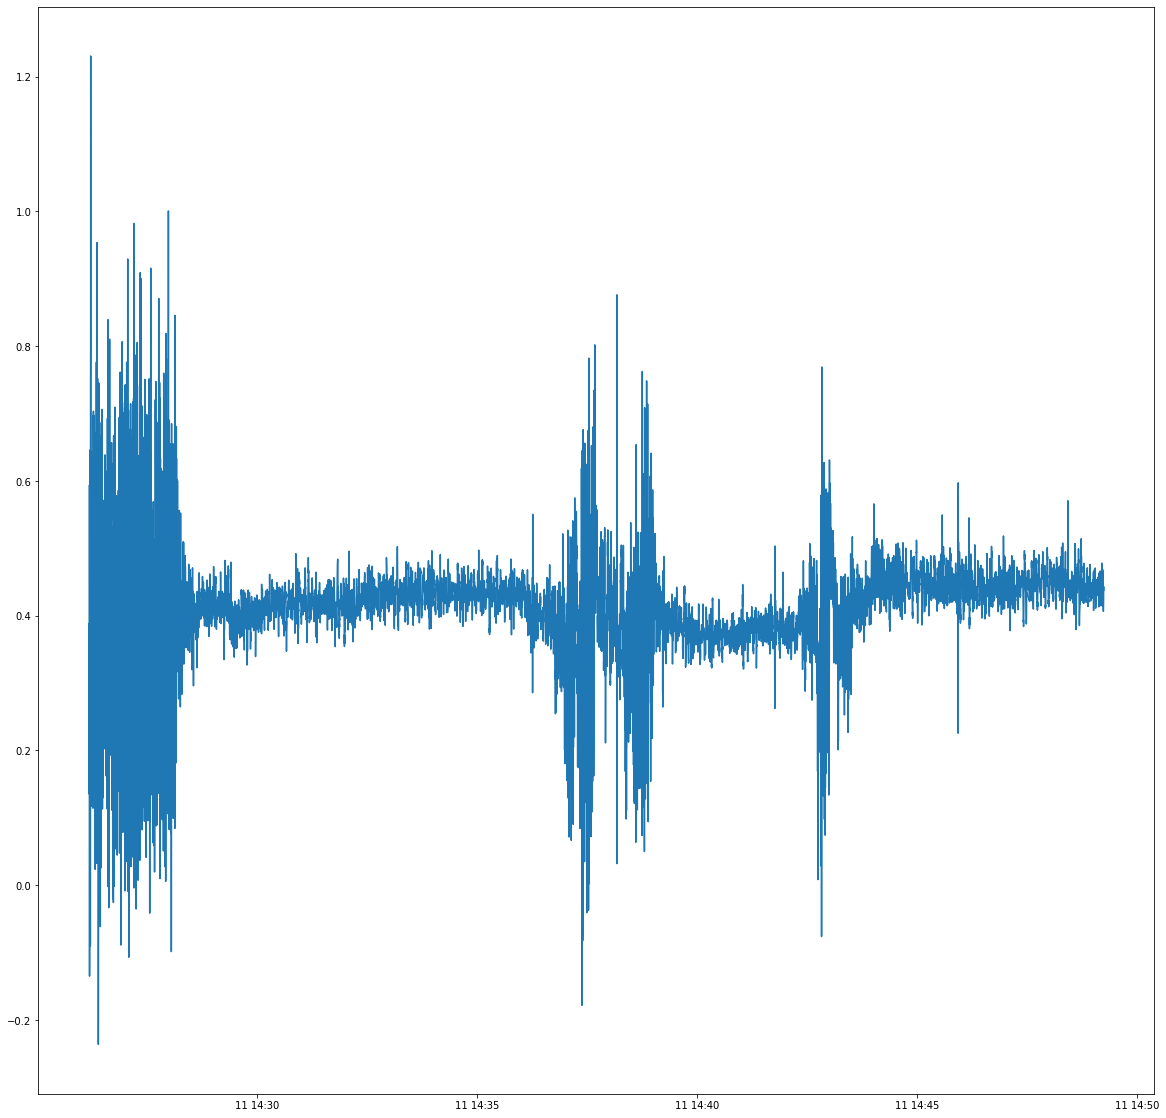

In [25]:
s = len(data) // 4
s = s+s//3 + s//48
plt.figure(figsize=(20, 20))
plt.plot(data["ax"][s:s+s//16])
plt.show()

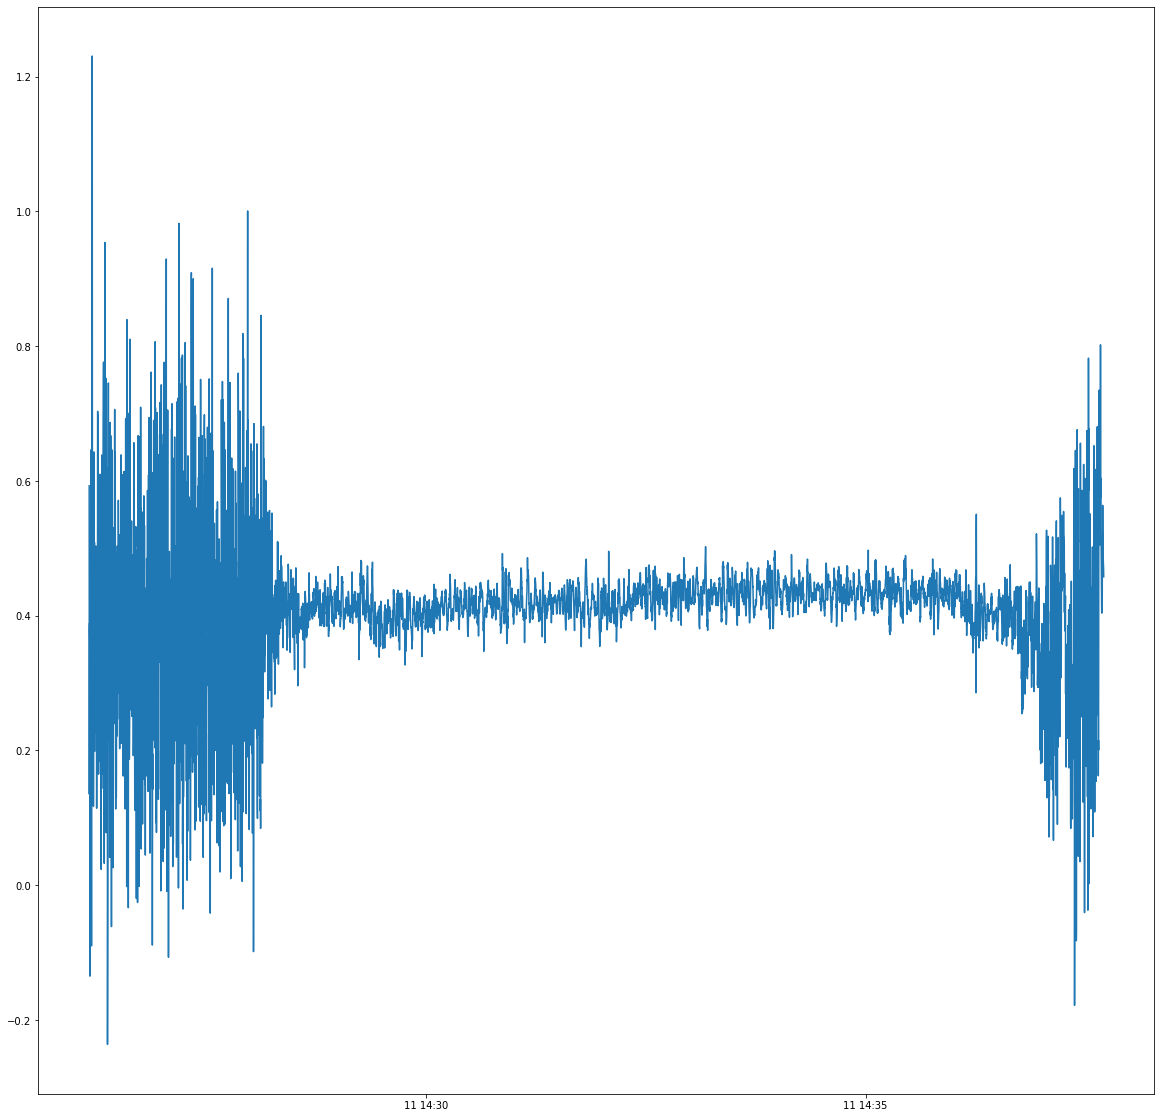

In [26]:
s = len(data) // 4
s = s+s//3 + s//48
plt.figure(figsize=(20, 20))
plt.plot(data["ax"][s:s+s//32])
plt.show()

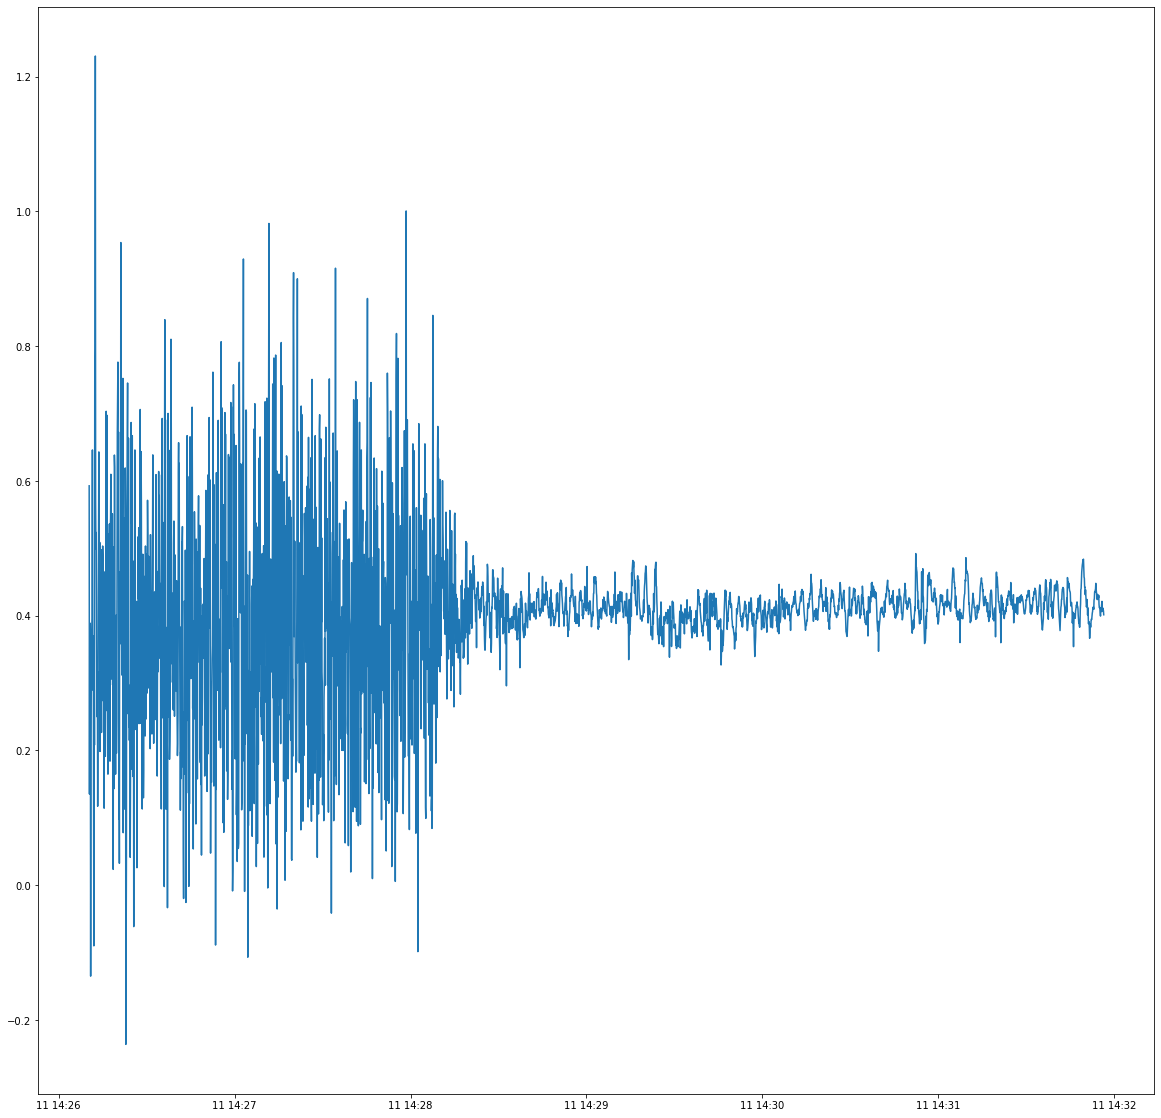

In [27]:
s = len(data) // 4
s = s+s//3 + s//48
plt.figure(figsize=(20, 20))
plt.plot(data["ax"][s:s+s//64])
plt.show()

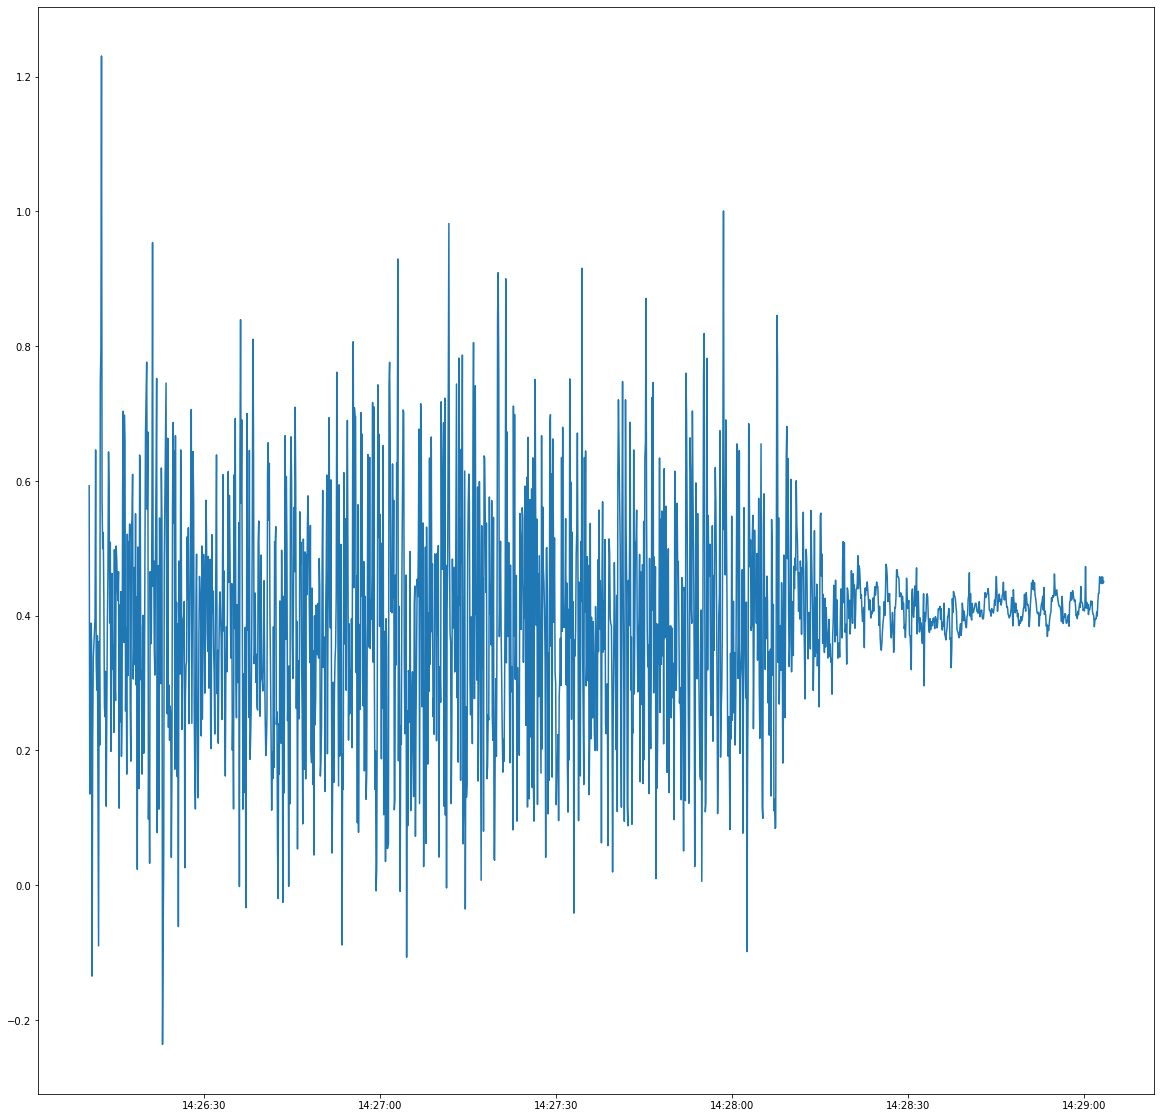

In [28]:
s = len(data) // 4
s = s+s//3 + s//48
plt.figure(figsize=(20, 20))
plt.plot(data["ax"][s:s+s//128])
plt.show()

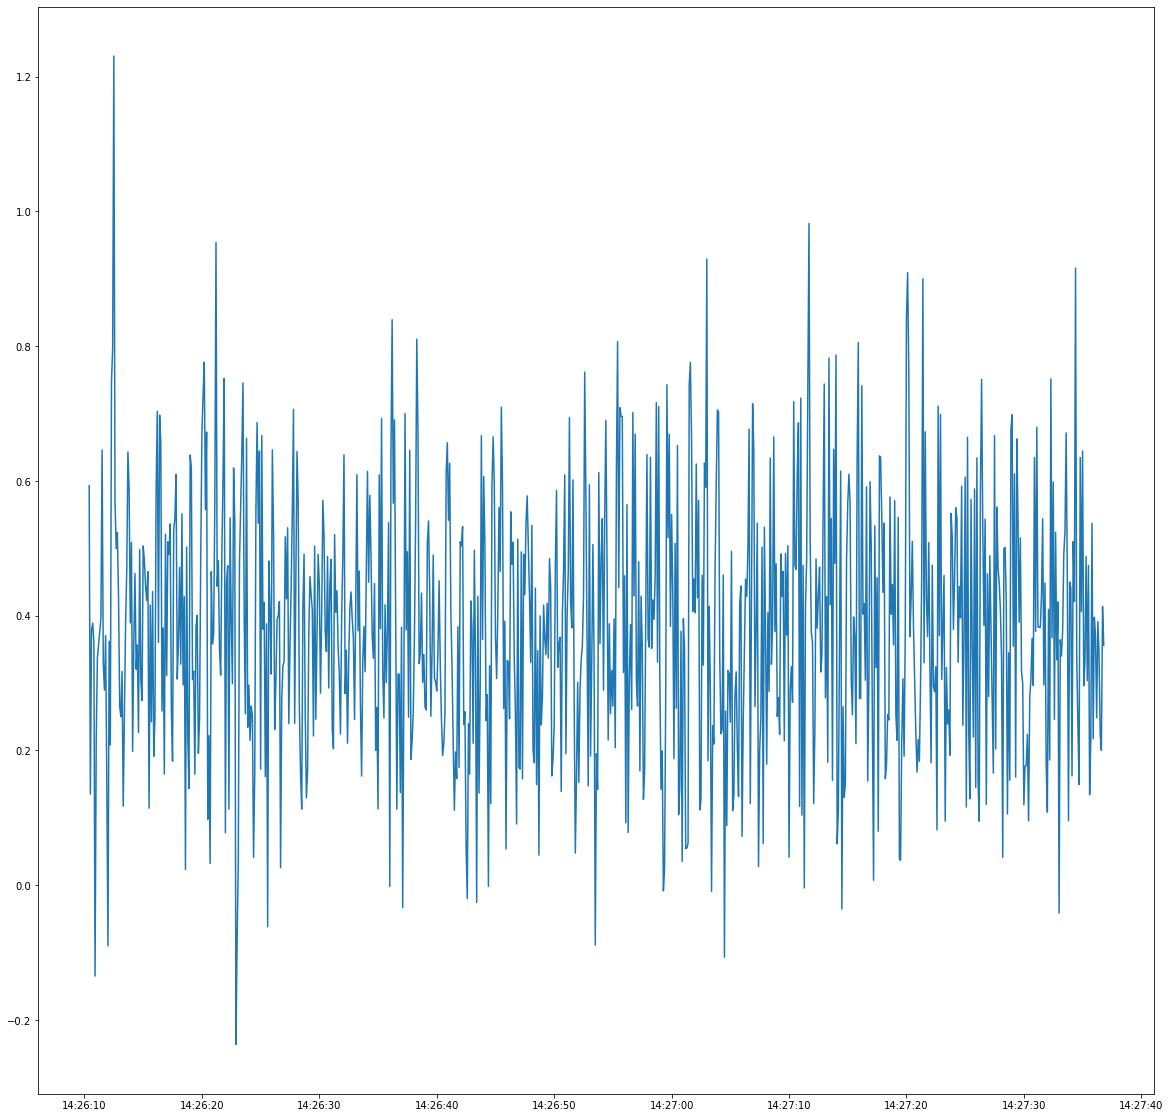

In [29]:
s = len(data) // 4
s = s+s//3 + s//48
plt.figure(figsize=(20, 20))
plt.plot(data["ax"][s:s+s//256])
plt.show()

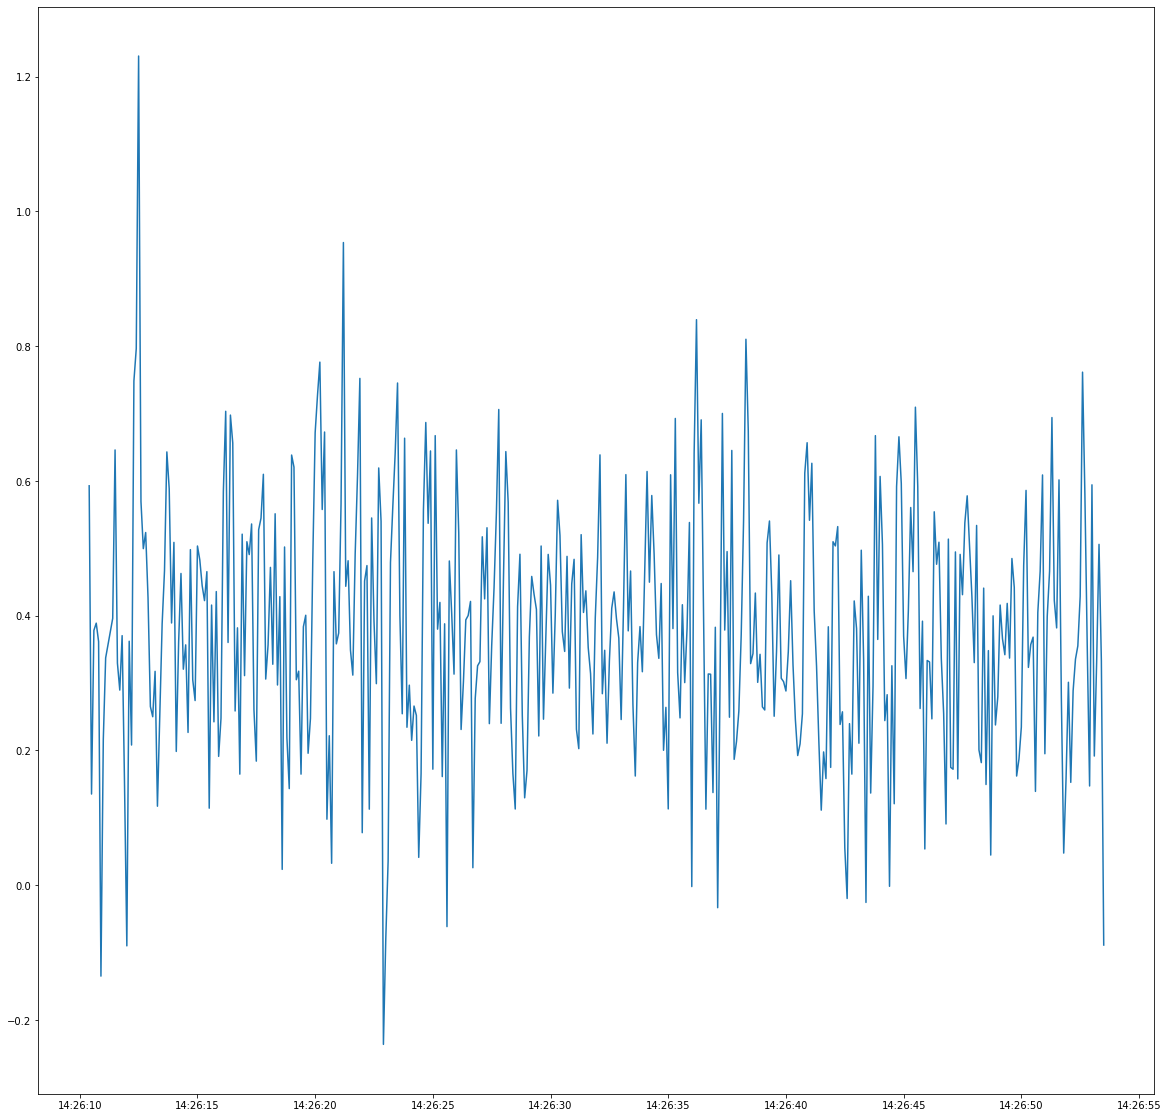

In [30]:
s = len(data) // 4
s = s+s//3 + s//48
plt.figure(figsize=(20, 20))
plt.plot(data["ax"][s:s+s//512])
plt.show()

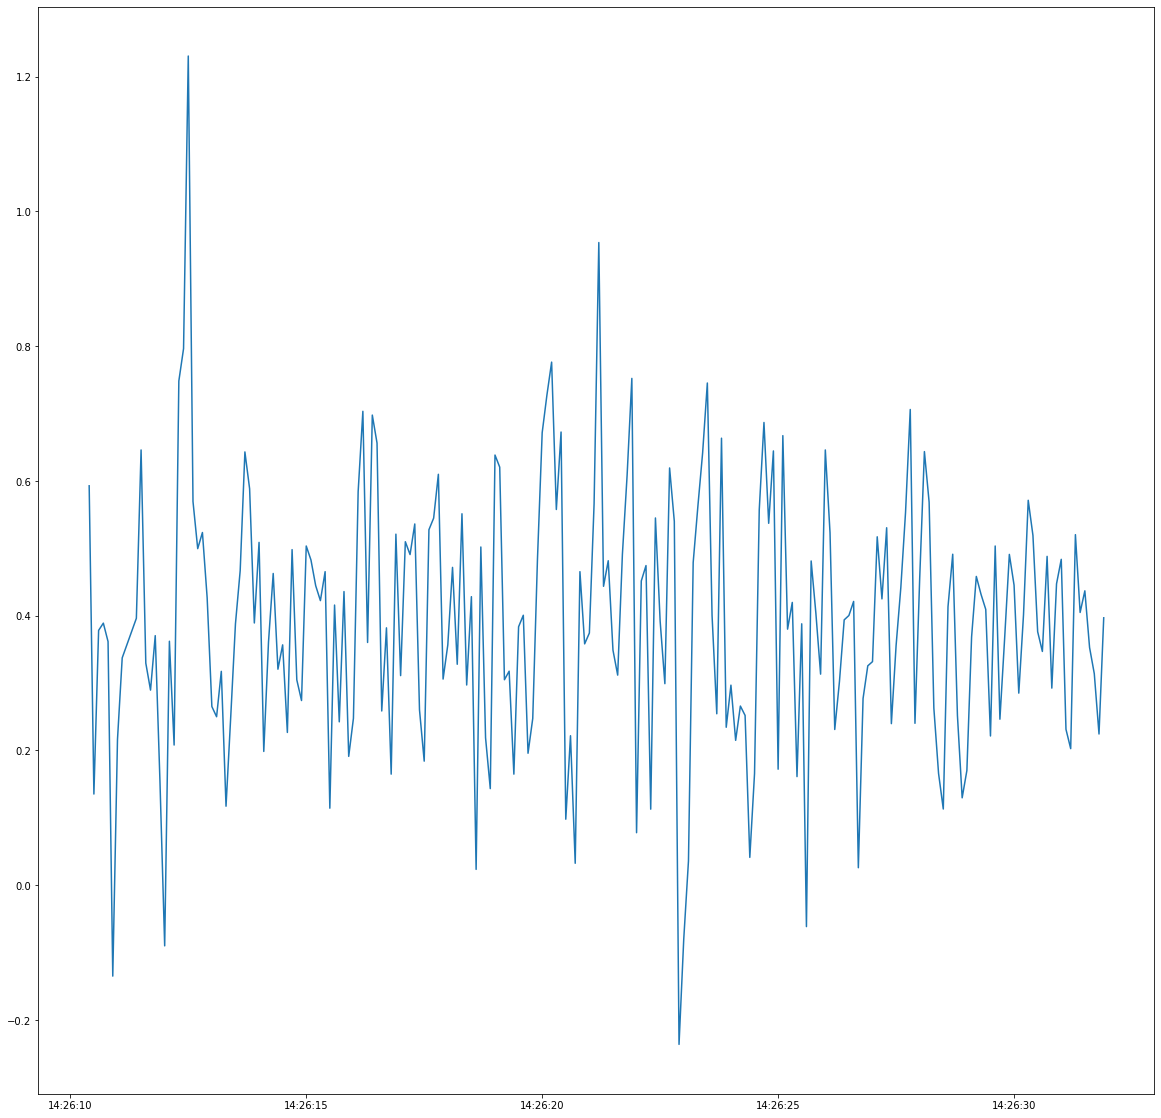

In [31]:
s = len(data) // 4
s = s+s//3 + s//48
plt.figure(figsize=(20, 20))
plt.plot(data["ax"][s:s+s//1024])
plt.show()

In [32]:
s//1024

216

In [ ]:
s = len(data) // 4
s = s+s//3 + s//48
plt.figure(figsize=(20, 20))
plt.plot(data["ax"][s:s+s//128])
plt.show()

In [33]:
d = data["ax"][s:s+s//128]

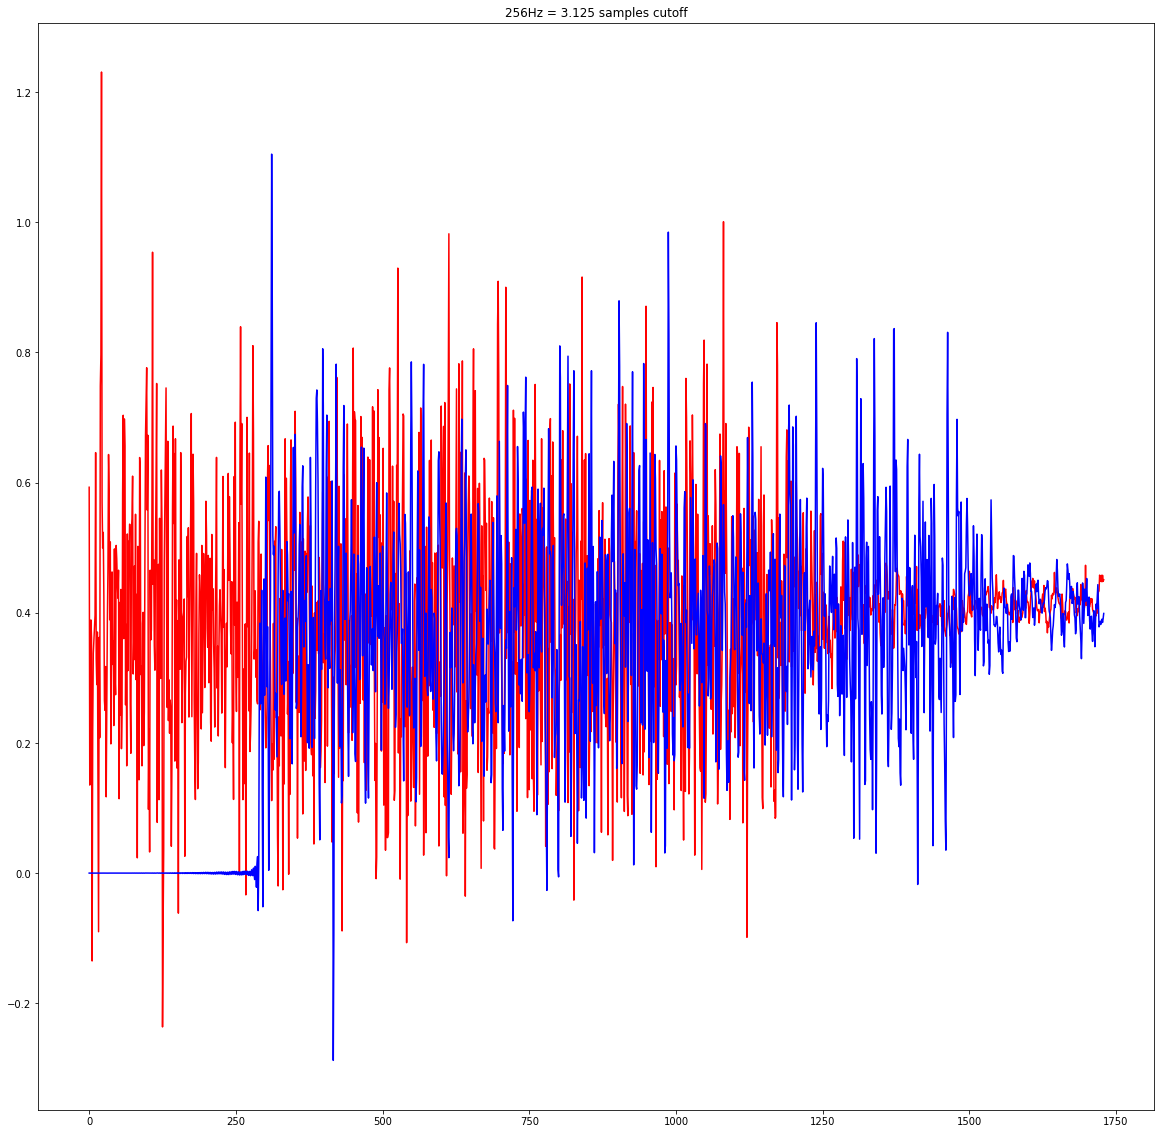

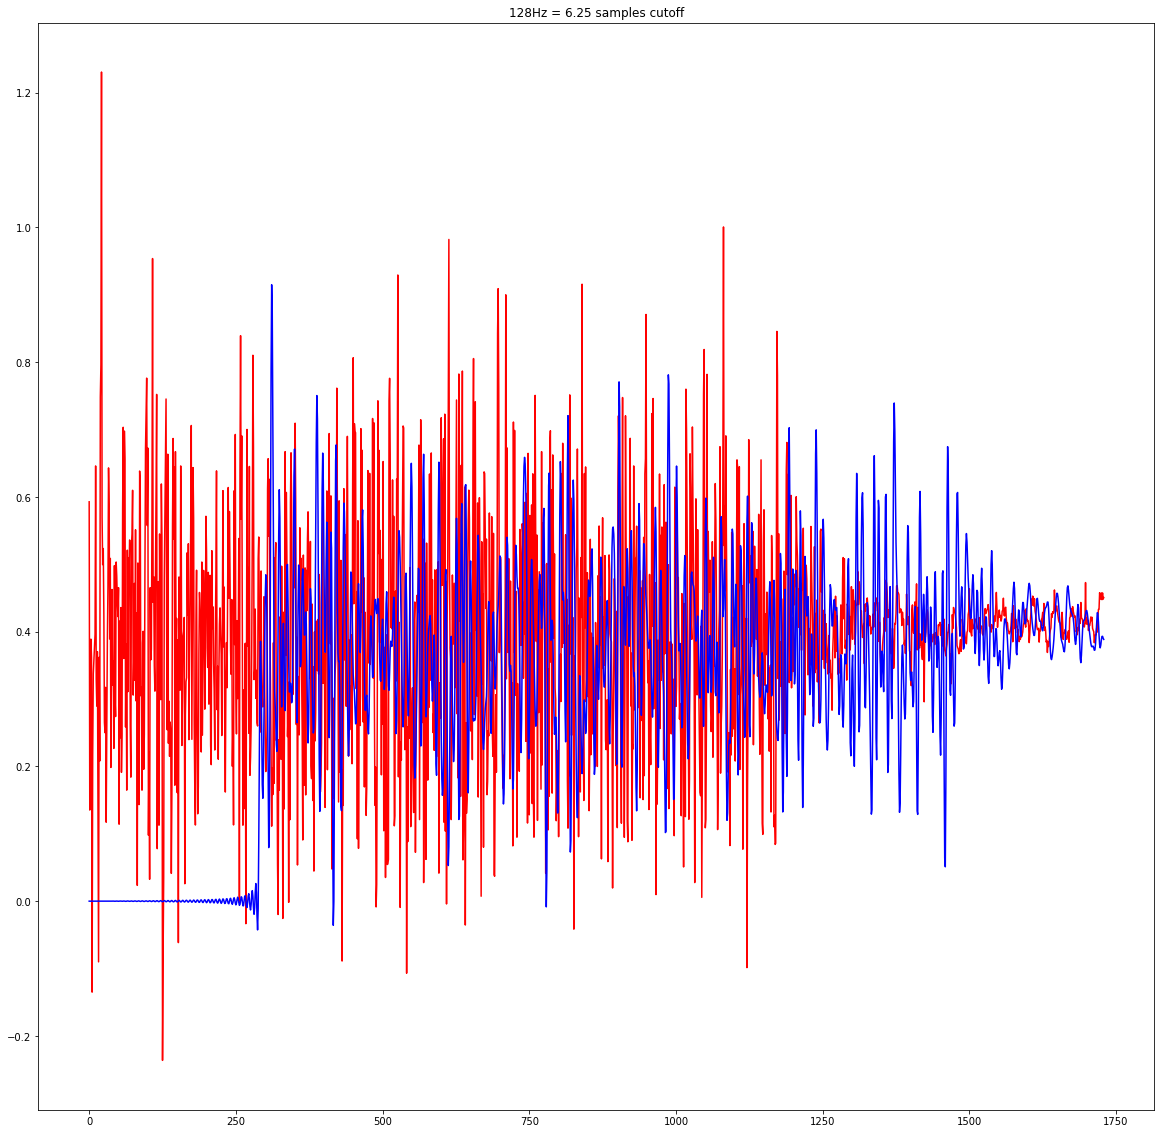

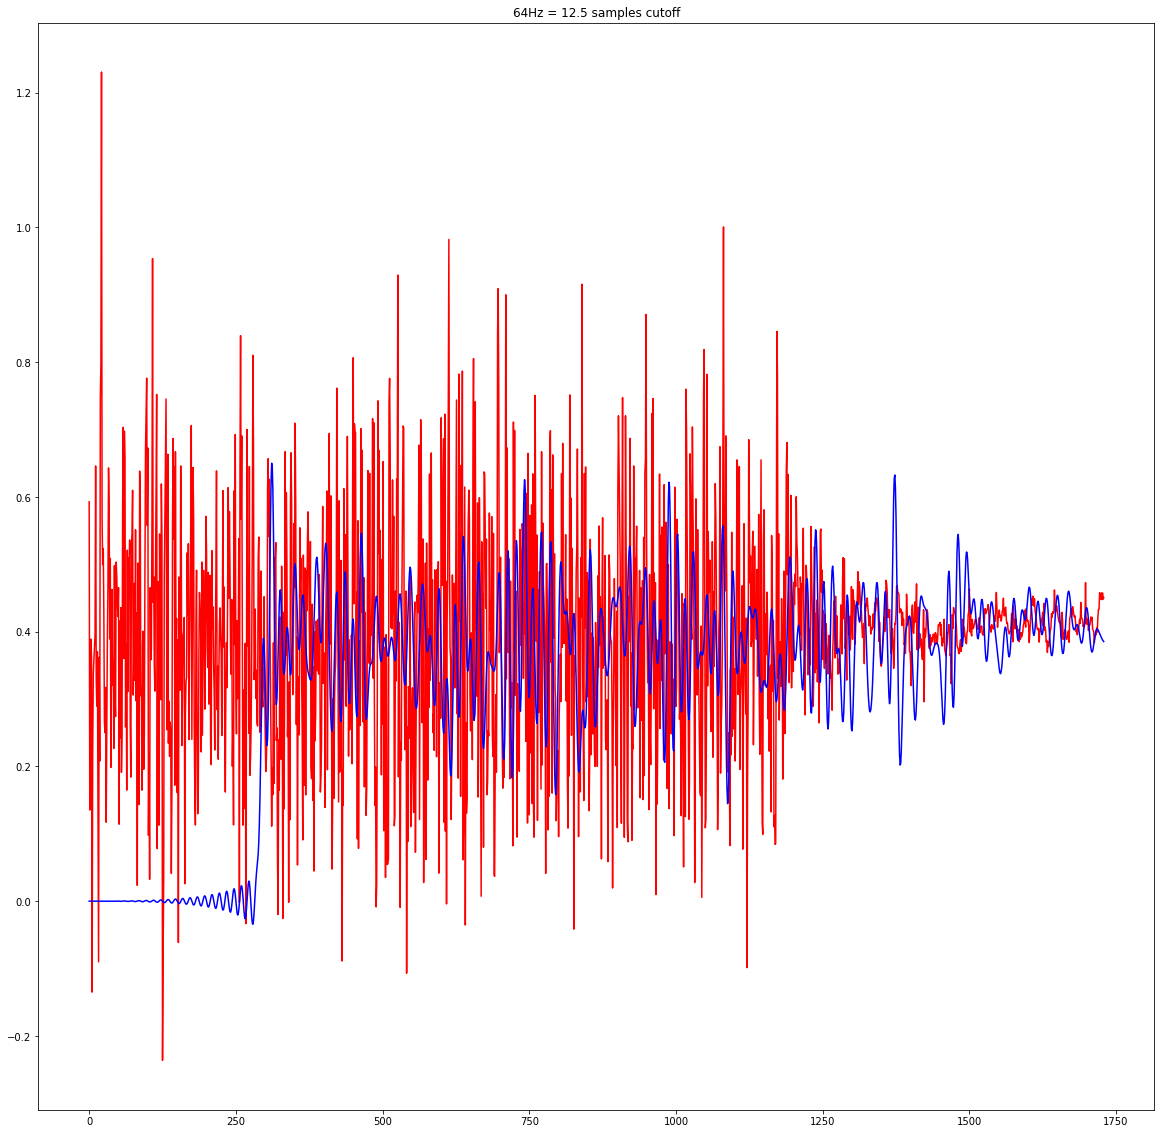

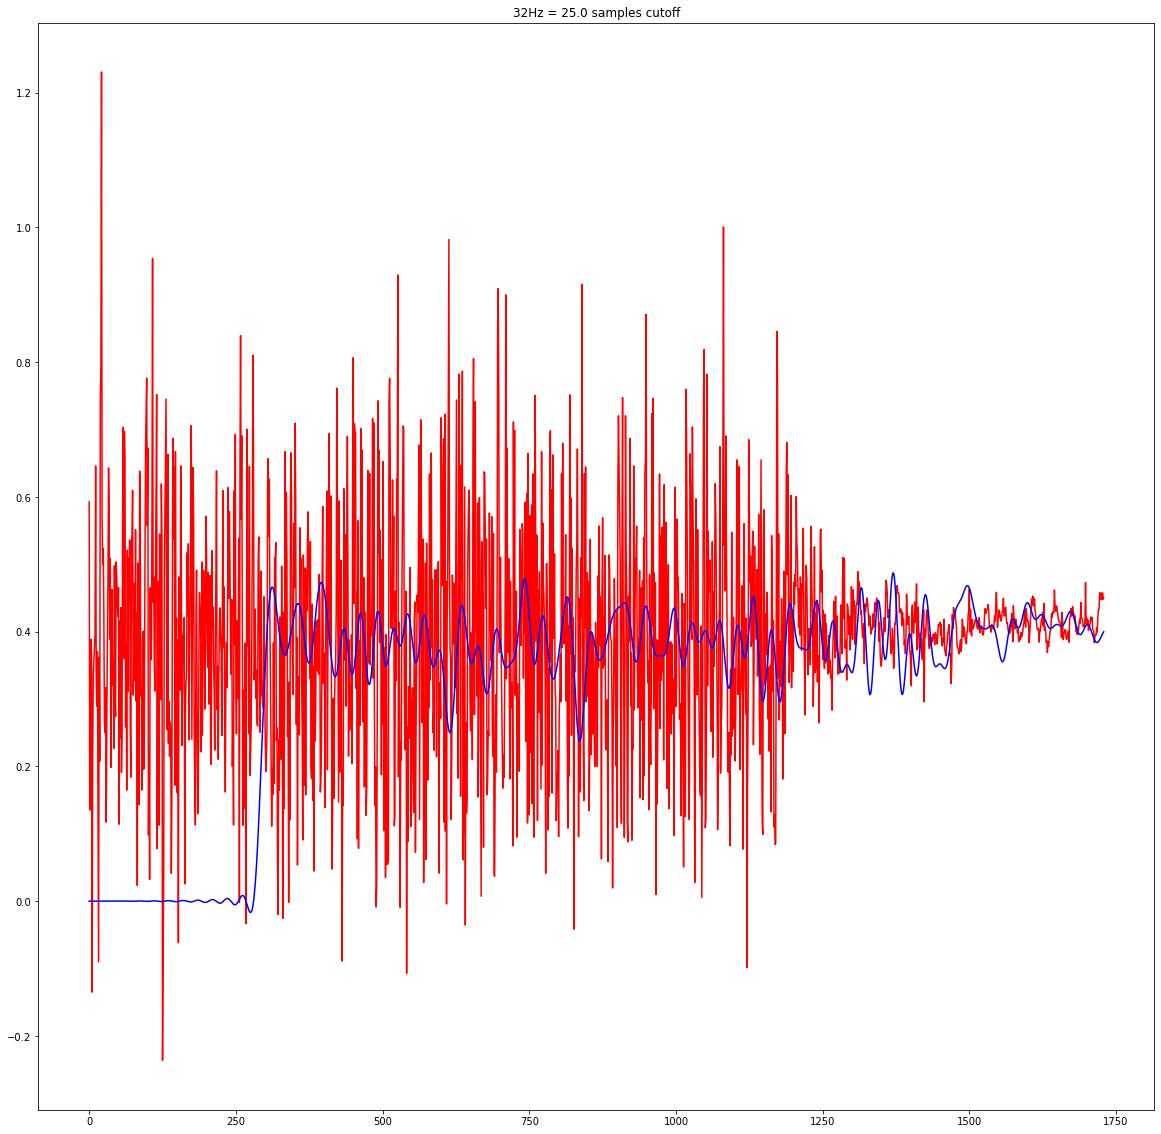

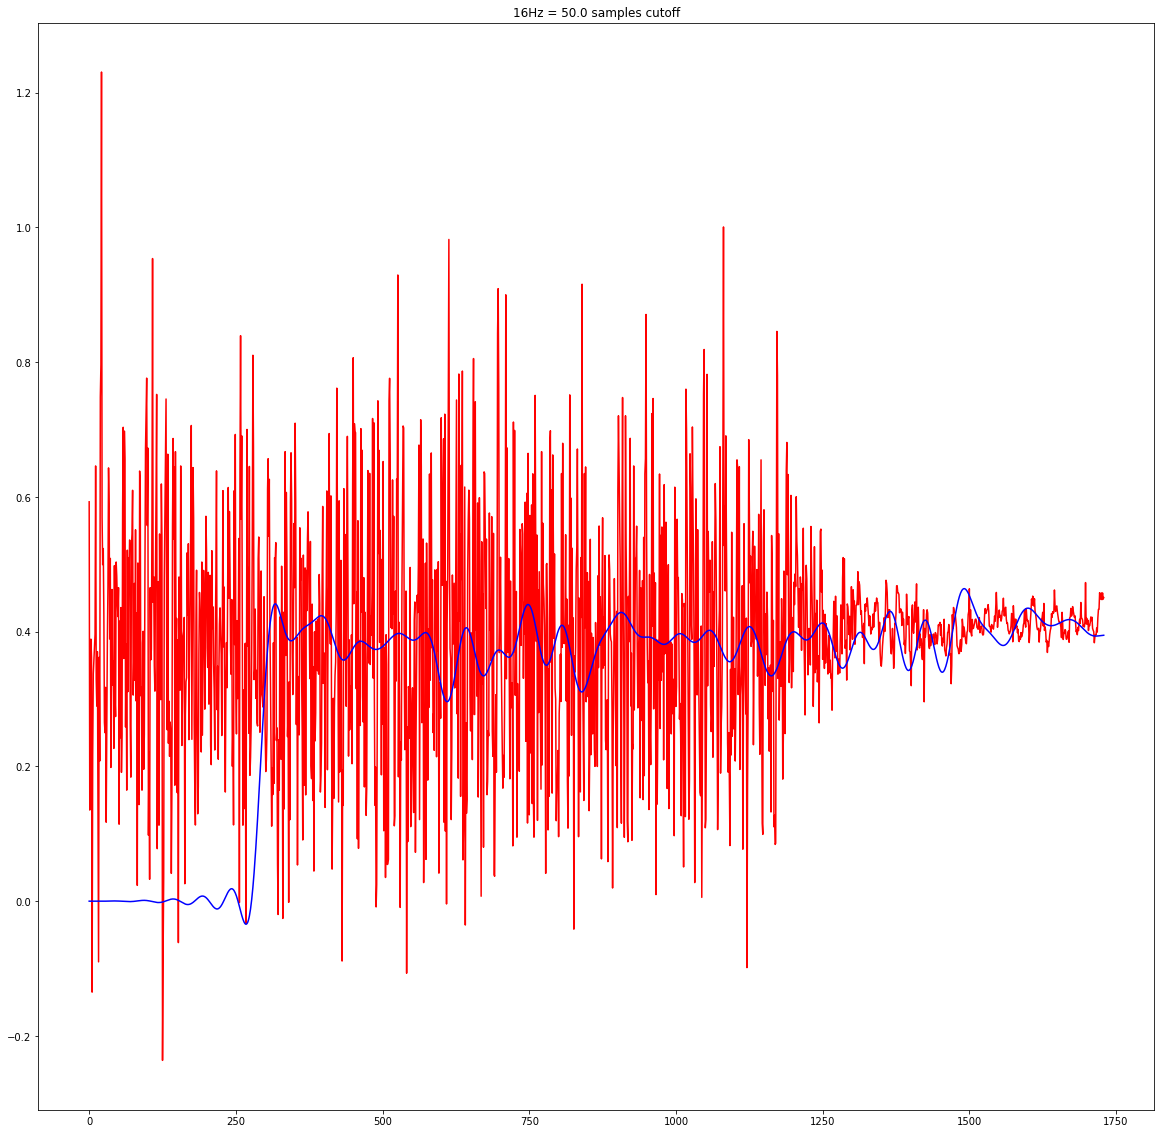

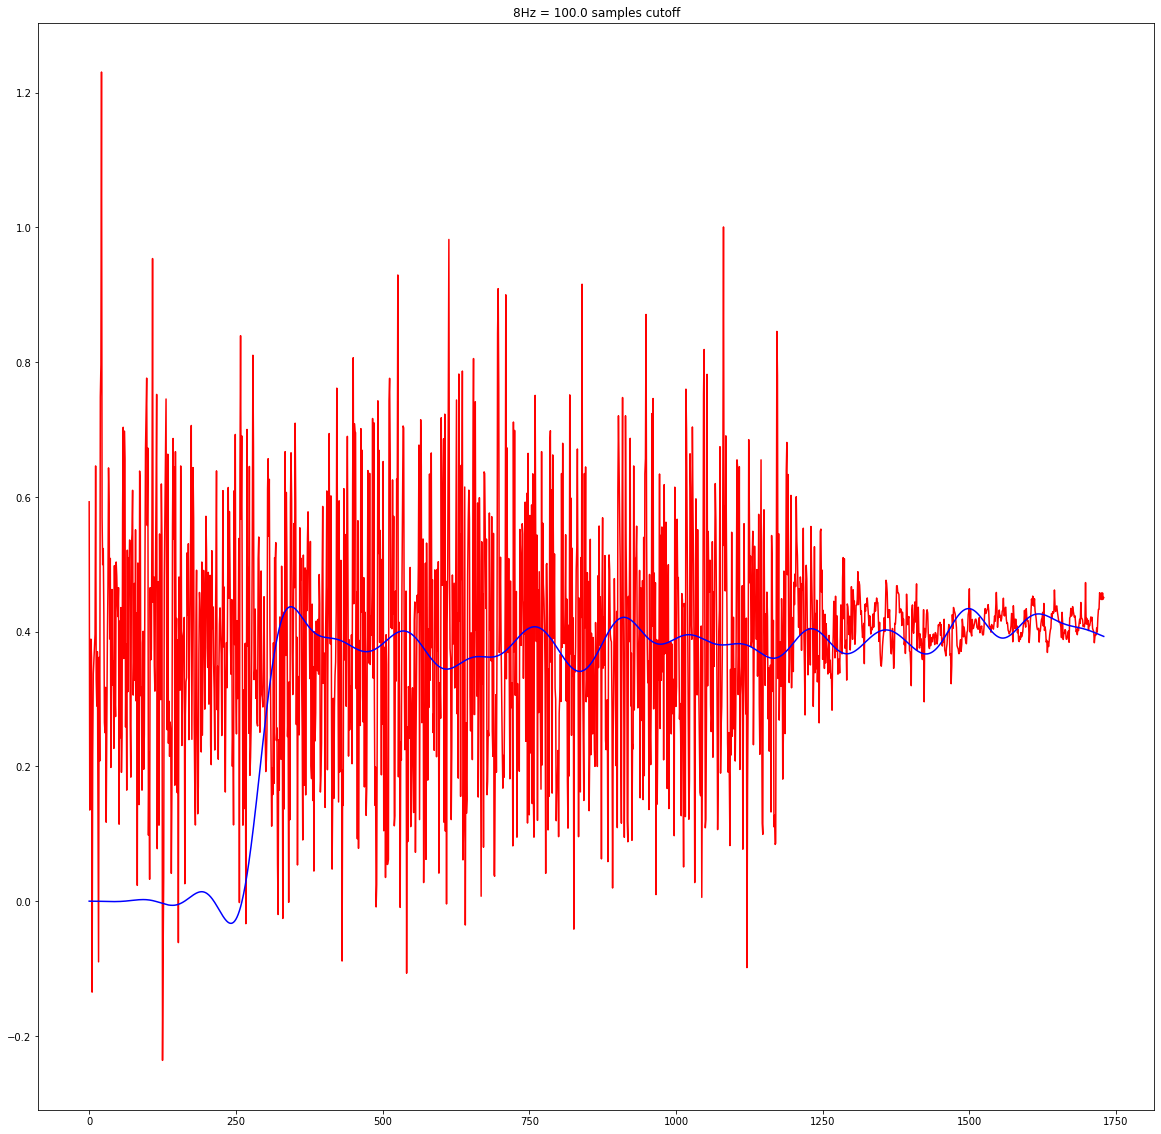

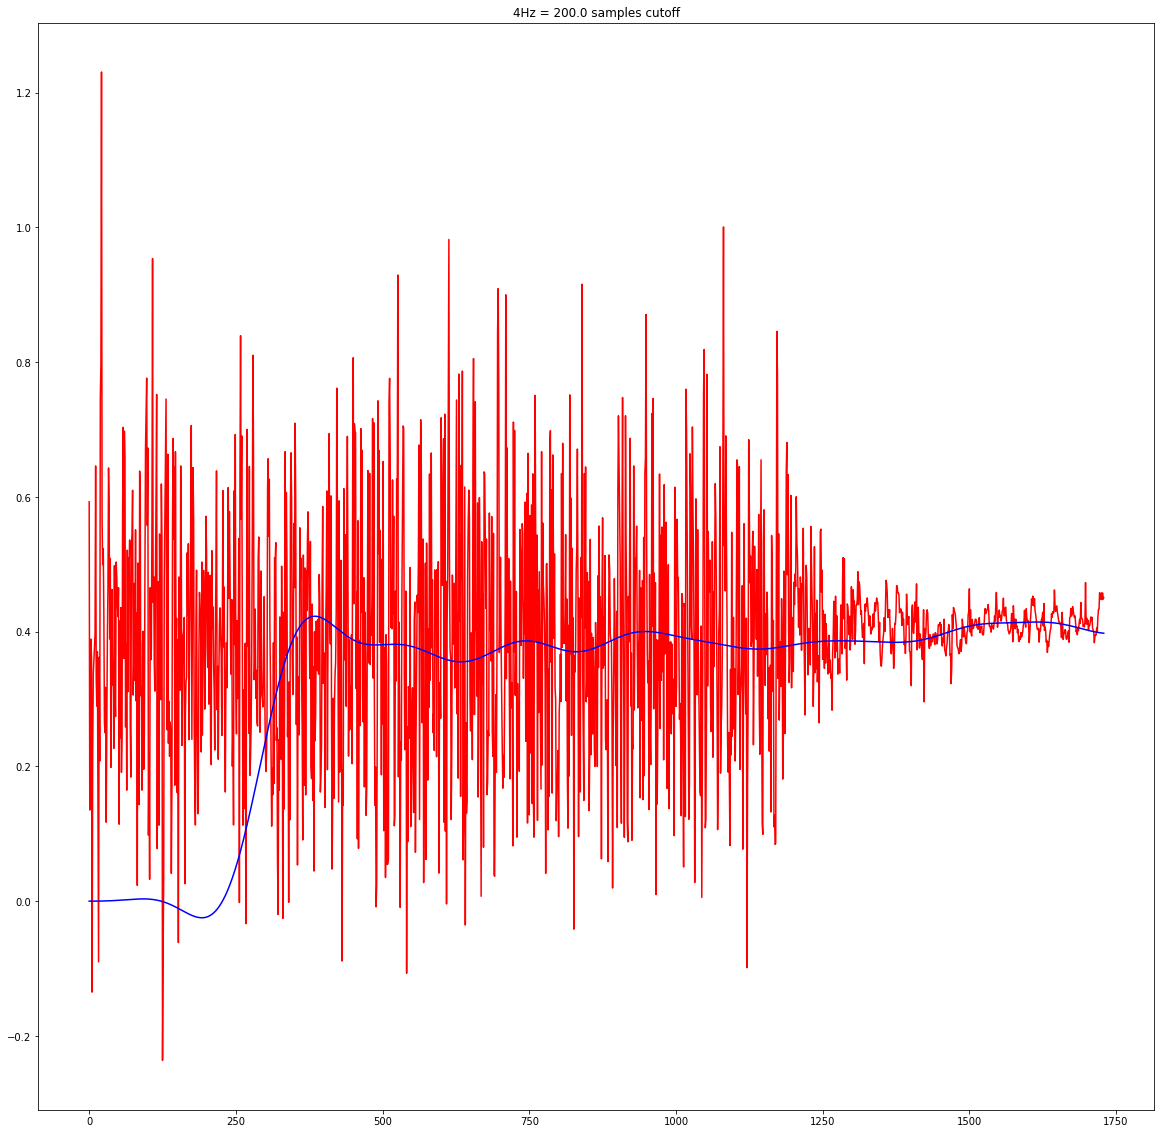

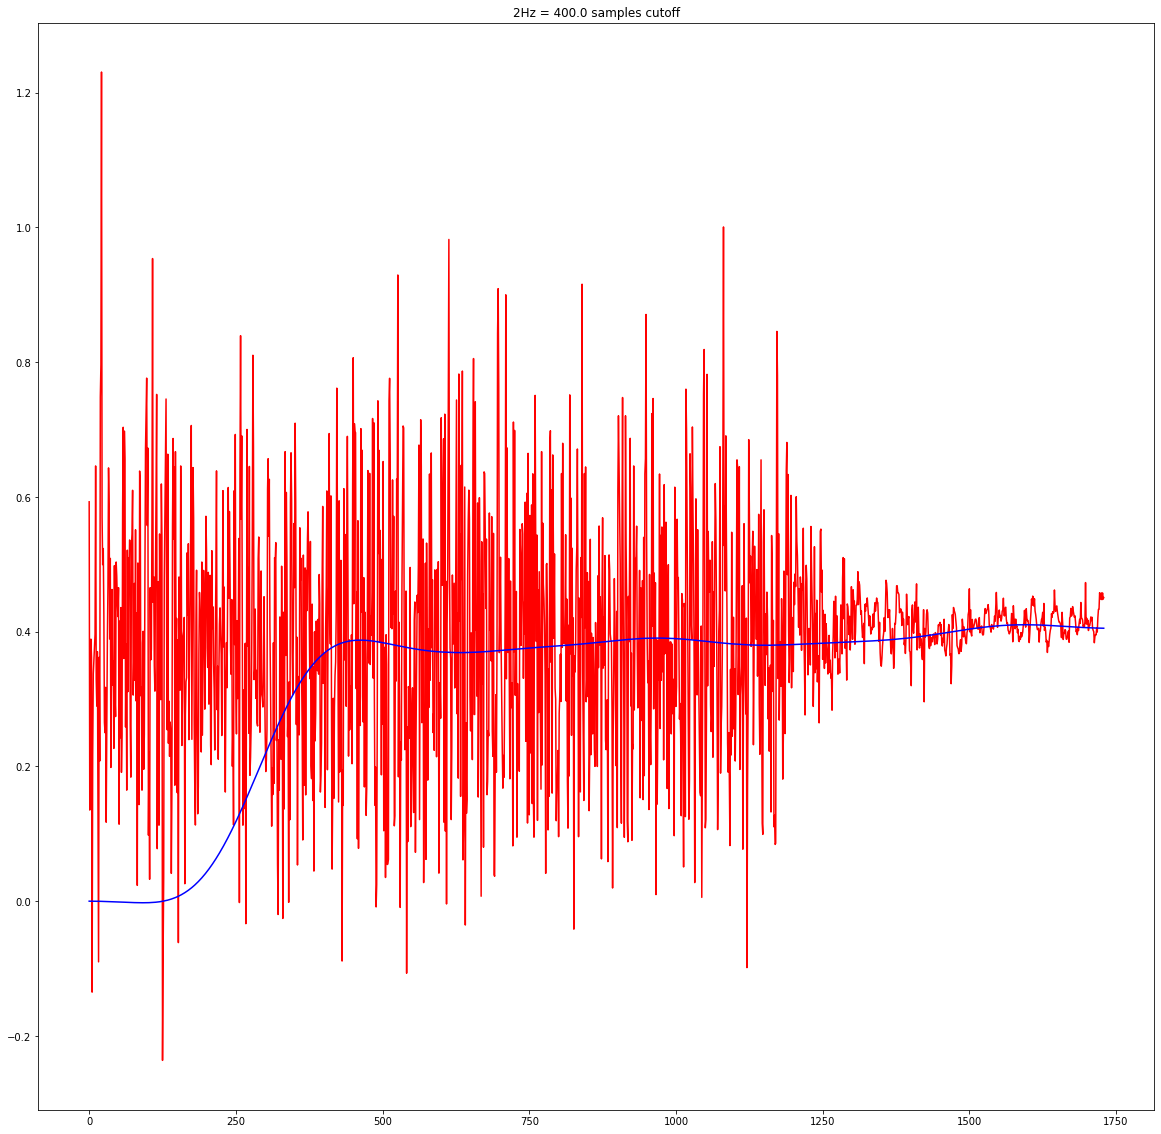

In [74]:
sample_rate = 800
nyq_rate = sample_rate / 2.0
width = 5.0/nyq_rate
ripple_db = 60.0

for i in range(int(np.log2(nyq_rate)), 0, -1):
    N, beta = scipy.signal.kaiserord(ripple_db, width)
    cutoff_hz = 2**i
    taps = scipy.signal.firwin(N, cutoff_hz, window=('kaiser', beta), fs=sample_rate)
    filtered_d = scipy.signal.lfilter(taps, 1.0, d)


    plt.figure(figsize=(20, 20))
    plt.plot(np.arange(len(d)), d, color="red")
    plt.plot(np.arange(len(d)), filtered_d, color="blue")
    plt.title("%sHz = %s samples cutoff" % (cutoff_hz, sample_rate / cutoff_hz))
    plt.show()
    

In [69]:
sample_rate = 400
nyq_rate = sample_rate / 2.0
width = 5.0/nyq_rate
ripple_db = 60.0

for i in range(int(np.log2(nyq_rate))-1, 0, -1):
    N, beta = scipy.signal.kaiserord(ripple_db, width)
    cutoff_hz = 2**i * sample_rate
    print("%sHz = %s samples cutoff" % (cutoff_hz,  sample_rate / cutoff_hz,))


25600Hz = 0.015625 samples cutoff
12800Hz = 0.03125 samples cutoff
6400Hz = 0.0625 samples cutoff
3200Hz = 0.125 samples cutoff
1600Hz = 0.25 samples cutoff
800Hz = 0.5 samples cutoff
